## importing imp libraries of python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## loading the data set

In [2]:
df = pd.read_csv("CLTV.csv")#loading the data set
cltv_data = pd.read_csv("CLTV.csv")#loading the data set
cltv_data


,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736
...,...,...,...,...,...,...,...,...,...,...,...,...
89387,89388,Male,Rural,High School,More than 10L,0,6,0,More than 1,B,Platinum,95736
89388,89389,Male,Urban,Bachelor,5L-10L,1,0,3897,More than 1,A,Platinum,67596
89389,89390,Female,Urban,Bachelor,5L-10L,0,4,3363,More than 1,B,Platinum,114120
89390,89391,Female,Rural,High School,2L-5L,0,8,0,More than 1,B,Platinum,71772


- data contains 89392 rows and 12 columns

In [3]:
cltv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 8.2+ MB


- data set have column call 'id' which we don't need so we can drop it

In [4]:
cltv_data.drop(["id"], axis = 1, inplace = True)

In [5]:
cltv_data.describe()

,marital_status,vintage,claim_amount,cltv
count,89392.000000,89392.000000,89392.000000,89392.000000
mean,0.575488,4.595669,4351.502416,97952.828978
std,0.494272,2.290446,3262.359775,90613.814793
min,0.000000,0.000000,0.000000,24828.000000
25%,0.000000,3.000000,2406.000000,52836.000000
50%,1.000000,5.000000,4089.000000,66396.000000
75%,1.000000,6.000000,6094.000000,103440.000000
max,1.000000,8.000000,31894.000000,724068.000000


-  ther are somr custemers that are connected to the company form last 8 years and some are new also
-  custemer age has so many variance
- max claim amount is very which is 31894 and minimum is 0 means the custemers is not claimd any ploicy
- cltv column has so big rage from 24k to 724k

## EDA
 # univariate analysis

In [6]:
cltv_data.columns

Index(['gender', 'area', 'qualification', 'income', 'marital_status',
       'vintage', 'claim_amount', 'num_policies', 'policy', 'type_of_policy',
       'cltv'],
      dtype='object')

In [7]:
# segregating variables into groups as object and int type
objects = ['gender', 'area', 'qualification','income', 'num_policies','policy','type_of_policy','vintage','marital_status']
integer = ['claim_amount','cltv']

## checking the categorical column distribution

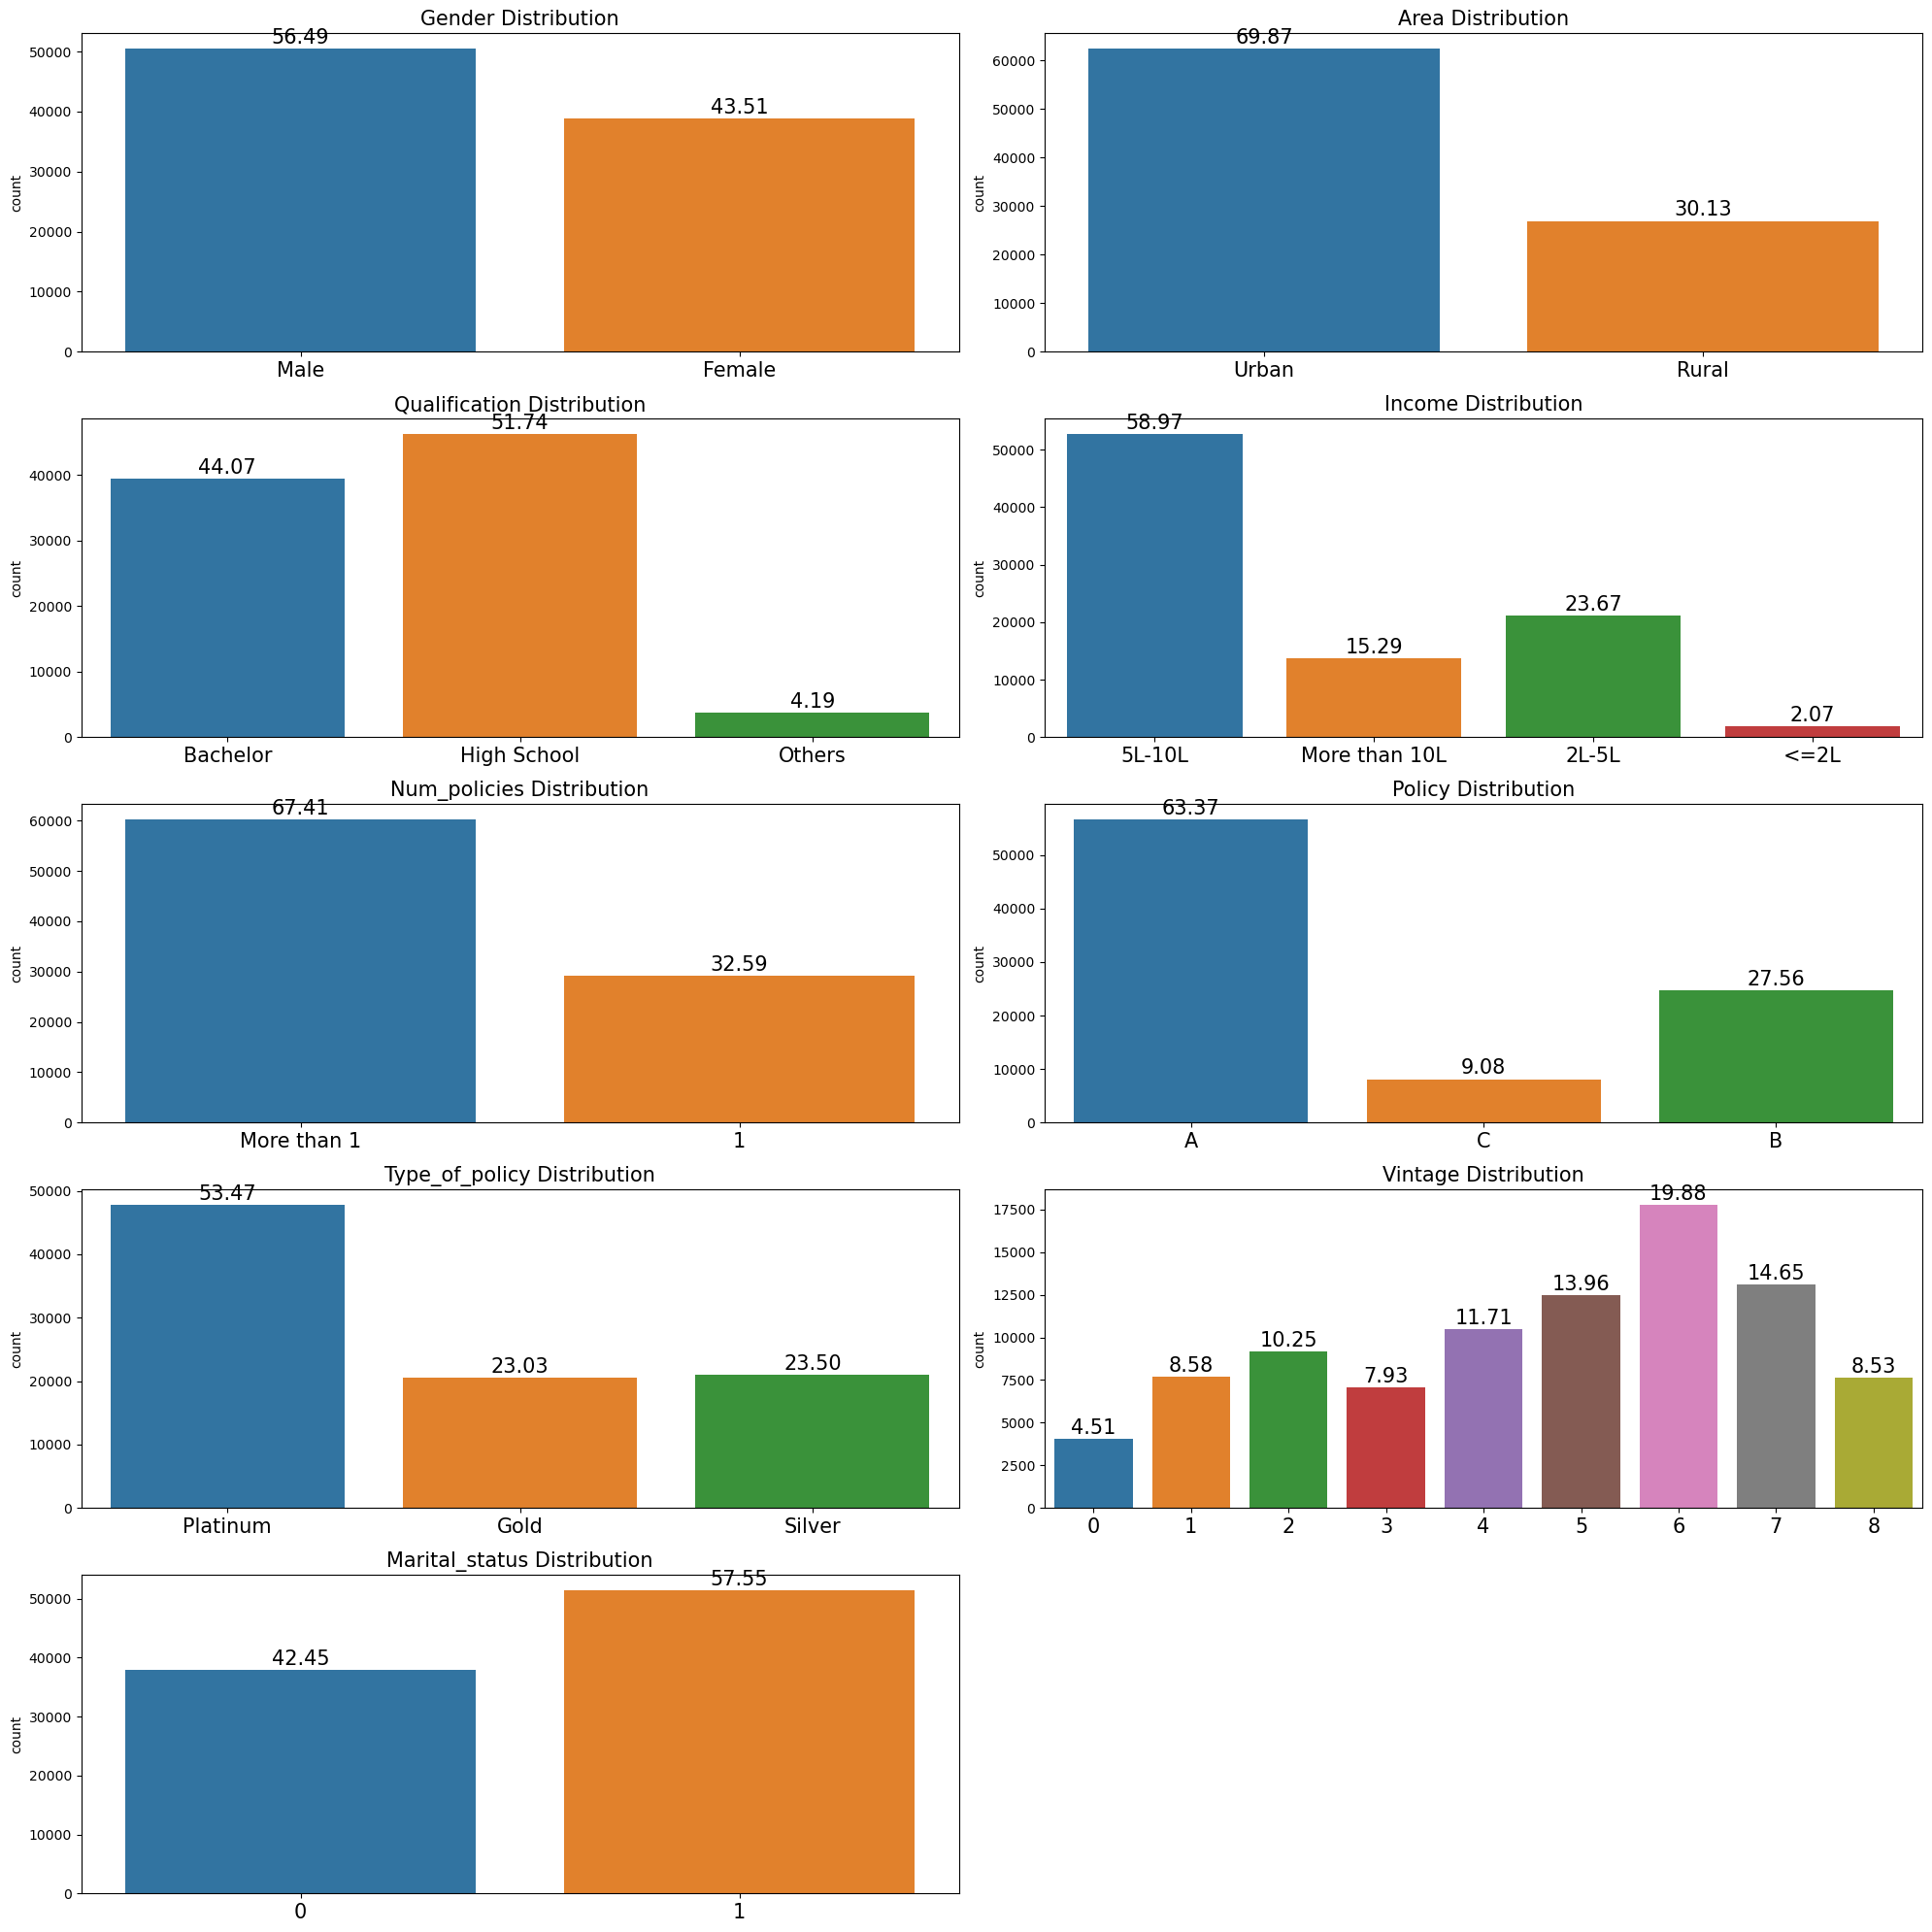

In [8]:

total = 89392 
fig=plt.subplots(figsize=(20, 20))
for i,col in enumerate(objects):
    freq = cltv_data[col].value_counts()
    plt.subplot(5,2,i+1)
    plots = sns.countplot(x=cltv_data[col])
    plt.title(col.capitalize()+" Distribution",fontsize=15)
    plt.xlabel("")
    plt.xticks(fontsize=15)
    for bar in plots.patches:
        plots.annotate(format(bar.get_height()/total*100.0, '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

         
    plt.tight_layout()
    
   
    
plt.show()

## CONCLUSIONS
 - gender distribution is colde to 50 - 50 %
 - there are more coustemers that are from urban ares almost 70% and almost 30% are from rural areas
 - thre are 67% peoples are having more than one policy which is good for compeney
 - looks like platinum type of policy is very populer amoung the coustemers,53% of coustemers are own platinum type policy
 - approx 50% of the coustemers are older than 5 years again a good sign
 - 

In [9]:
# univariate analysis of numeric data function


def An_numaric(df, var_group):
    
    size = len(var_group)
    plt.figure(figsize = (30,30), dpi = 100)
    for j,i in enumerate(var_group):
        minimum = df[i].min()
        maximum = df[i].max()
        rang = df[i].max() - df[i].min()
        median = df[i].median()
        mean = df[i].mean()
        skew = df[i].skew()
        standerd_deviation = df[i].std()
        kurt = df[i].kurtosis() 
        points = mean-standerd_deviation, mean+standerd_deviation
    
        #Plotting the variable with every information
        plt.subplot(4,2,j+1)
        sns.kdeplot(x=df[i], shade=True)
        sns.lineplot(x=points, y=[0,0], color = 'black', label = "std_dev")
        sns.scatterplot(x=[minimum,maximum], y=[0,0], color = 'orange', label = "min/max")
        sns.scatterplot(x=[mean], y=[0], color = 'red', label = "mean")
        sns.scatterplot(x=[median], y=[0], color = 'blue', label = "median")
        plt.xlabel('{}'.format(i), fontsize = 20)
        plt.ylabel('density')
        plt.tight_layout(pad=5.0)
        plt.title('within 1 std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(minimum,2),round(maximum,2),round(rang,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))
    
    

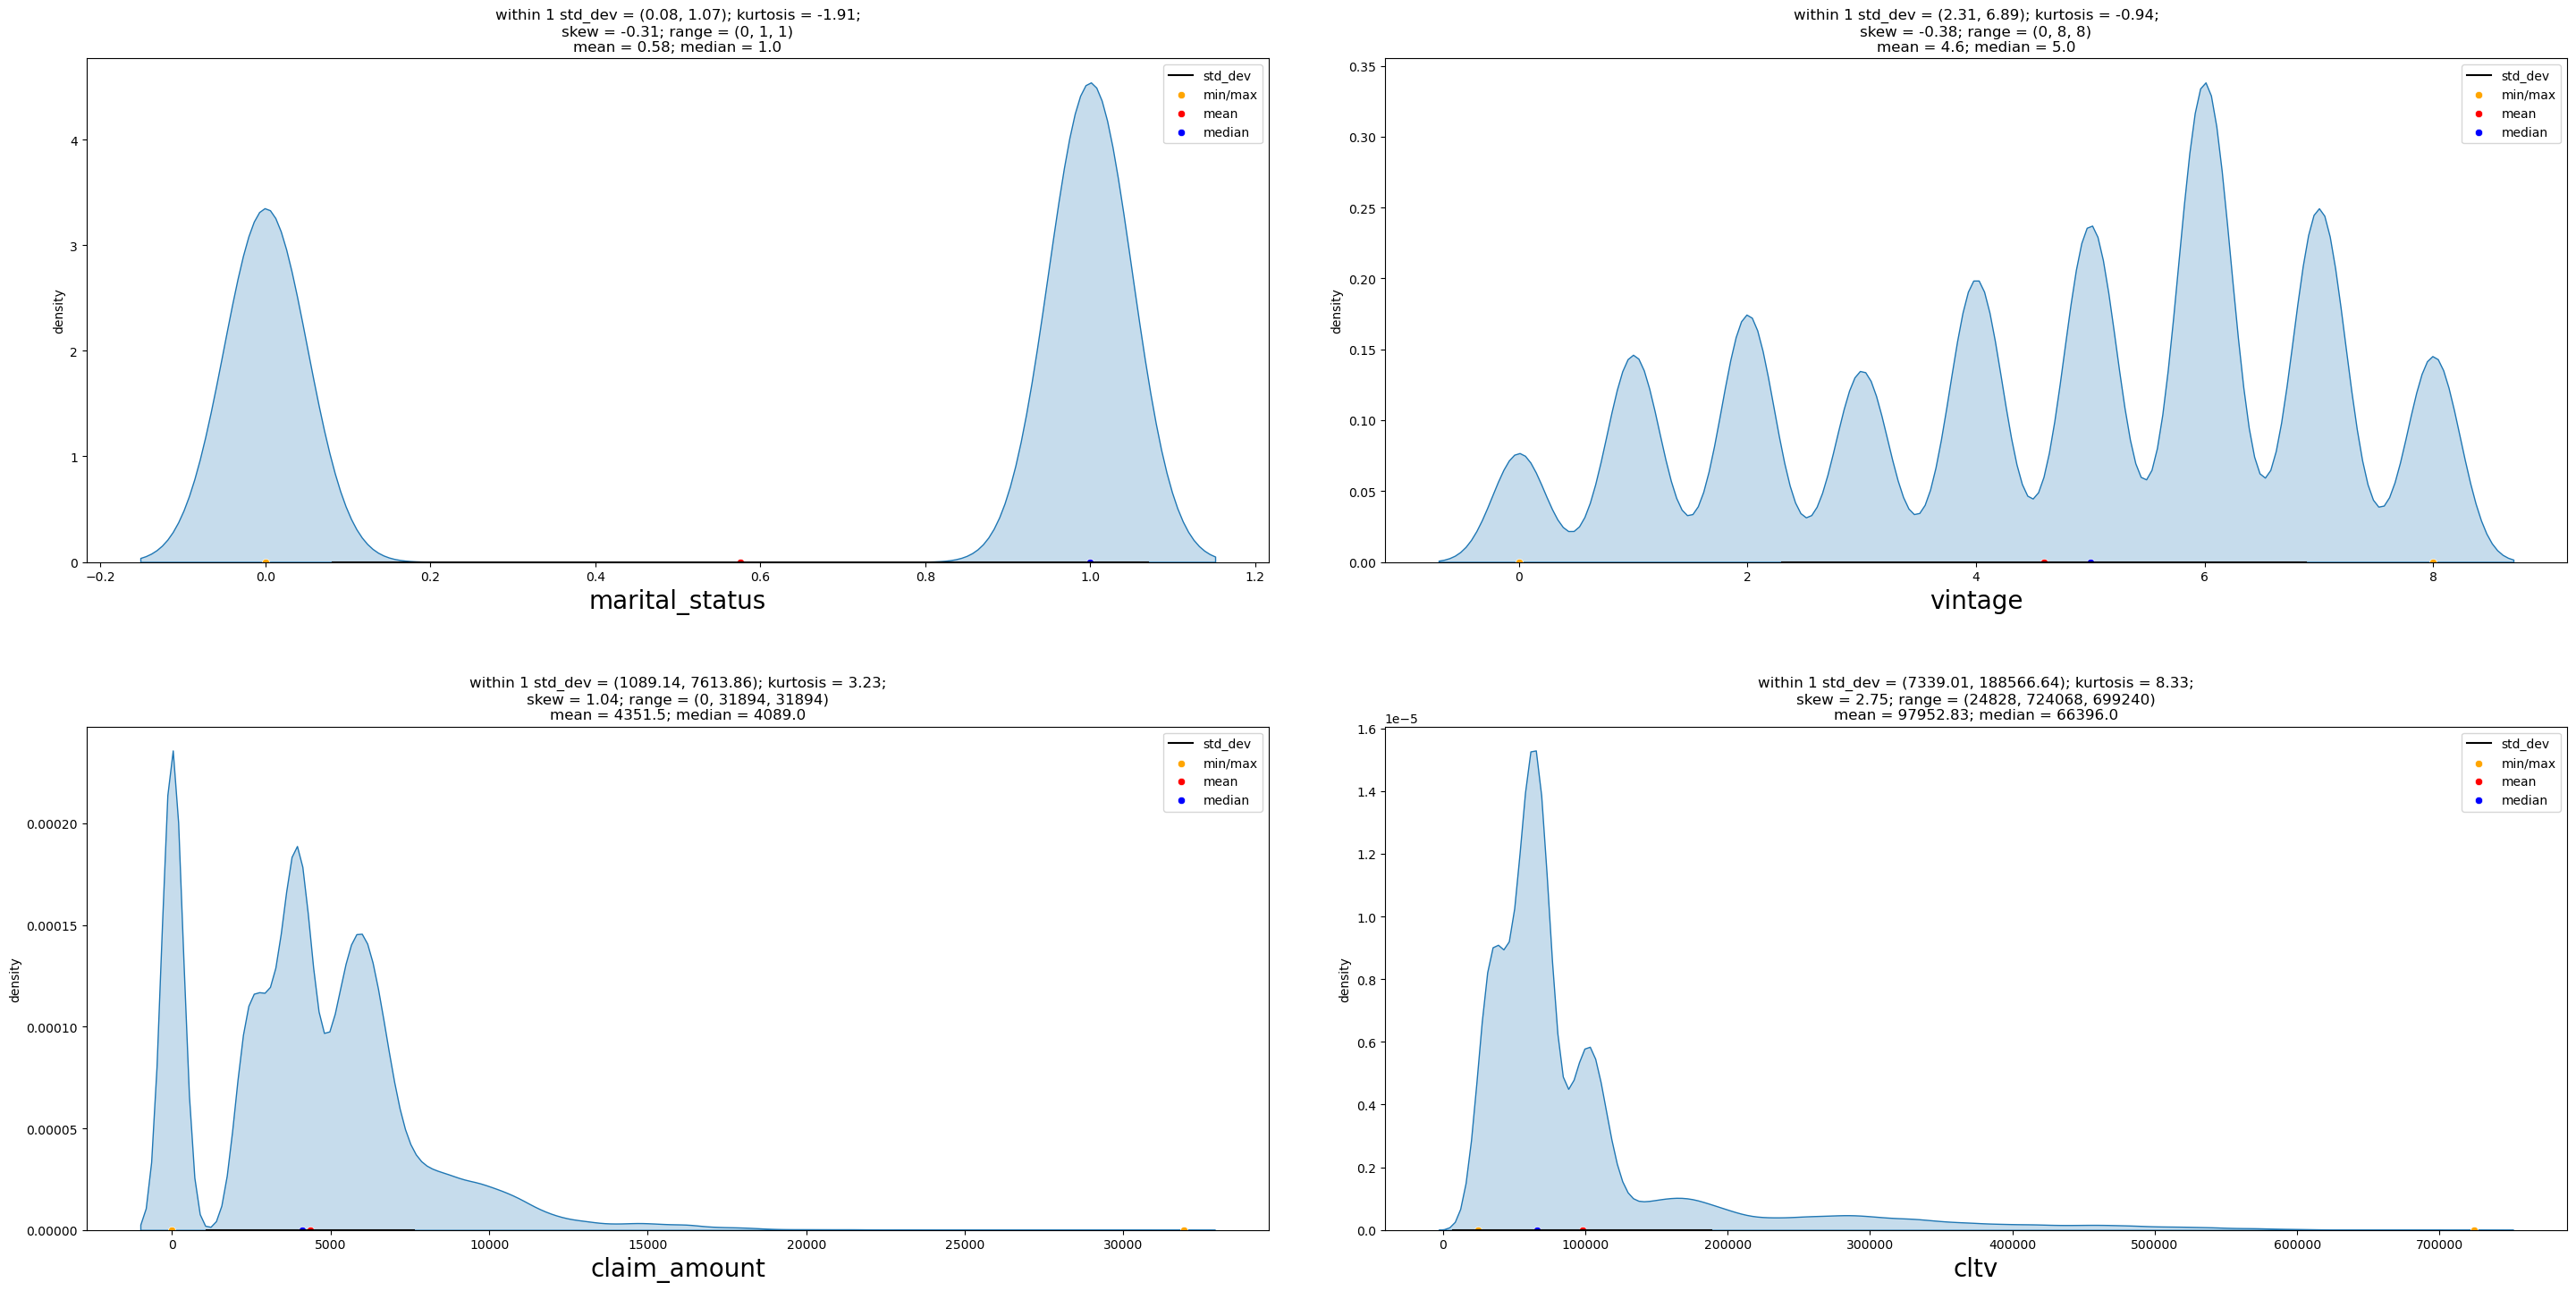

In [39]:
An_numaric(cltv_data,integer)

In [10]:
non_claim_count = cltv_data[cltv_data['claim_amount'] <= 1].count()
non_claim_count/total*100.0

gender            19.767988
area              19.767988
qualification     19.767988
income            19.767988
marital_status    19.767988
vintage           19.767988
claim_amount      19.767988
num_policies      19.767988
policy            19.767988
type_of_policy    19.767988
cltv              19.767988
dtype: float64

In [ ]:
non_claim_count = cltv_data[cltv_data['cltv'] <= 1].count()
non_claim_count/total*100.0

## CONCLUSIONS
- claim amount and cltv are positively skewed and they also contain outliers also 
- there are almost 20% coustemers are not claim their policies
- 

In [11]:
def side_by_side_plot(df,grp,valcol,rot=None):
    clr="Paired"
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
    fig.tight_layout()
    sns.kdeplot(x=df[valcol], hue=df[grp],ax=ax1,palette=clr)
    ax1.set_title(grp.capitalize()+" Wise "+valcol.capitalize()+" Distribution",size=15)
    ax1.set_xlabel(valcol,fontsize=20)
    sns.boxplot(x=df[grp],y=df[valcol],ax=ax2,palette=clr)
    ax2.set_title(grp.capitalize()+" Wise "+valcol.capitalize()+" Distribution",size=15)
    ax2.set_xlabel(grp,fontsize=20)
    ax2.tick_params(rotation=rot)

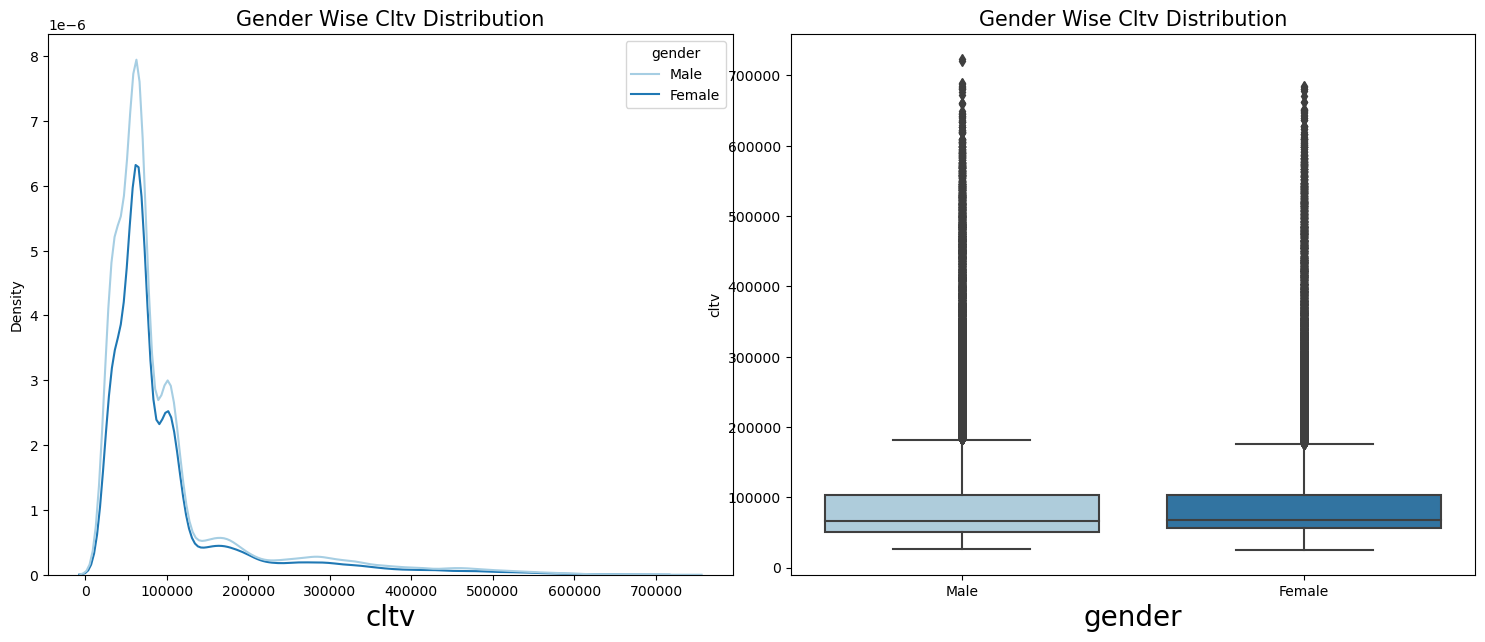

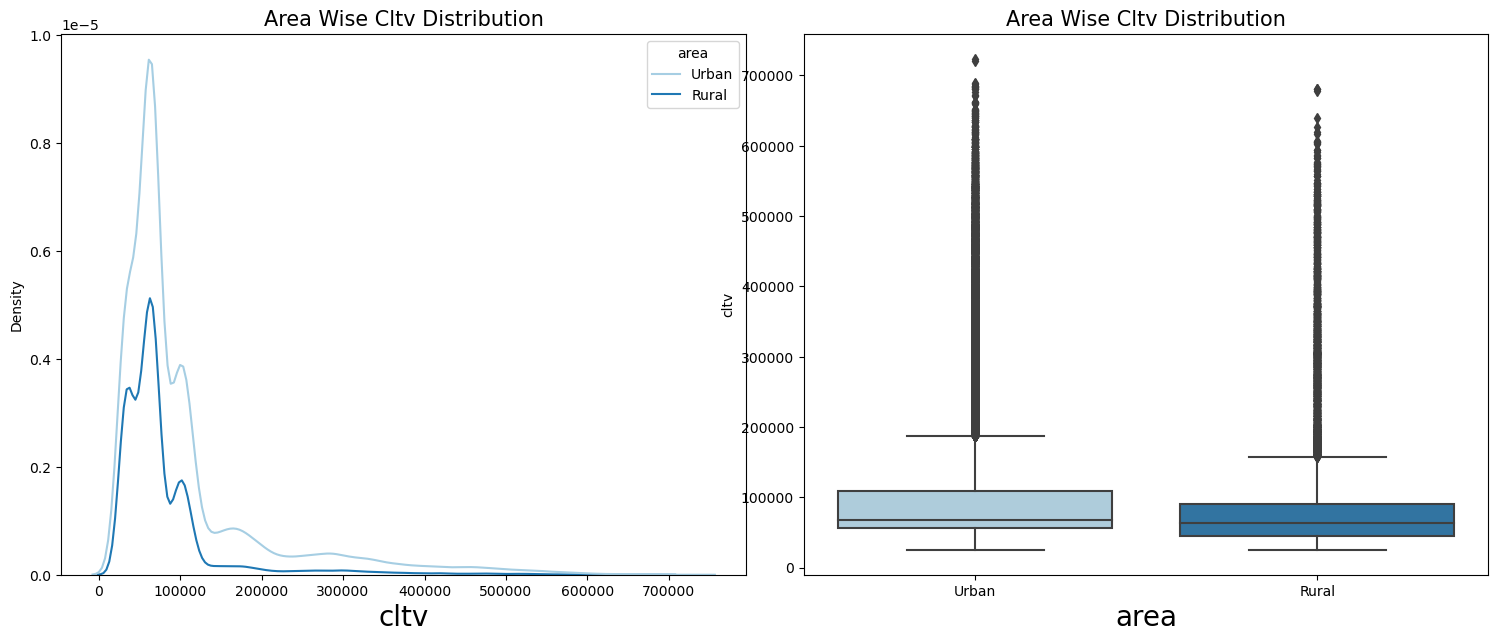

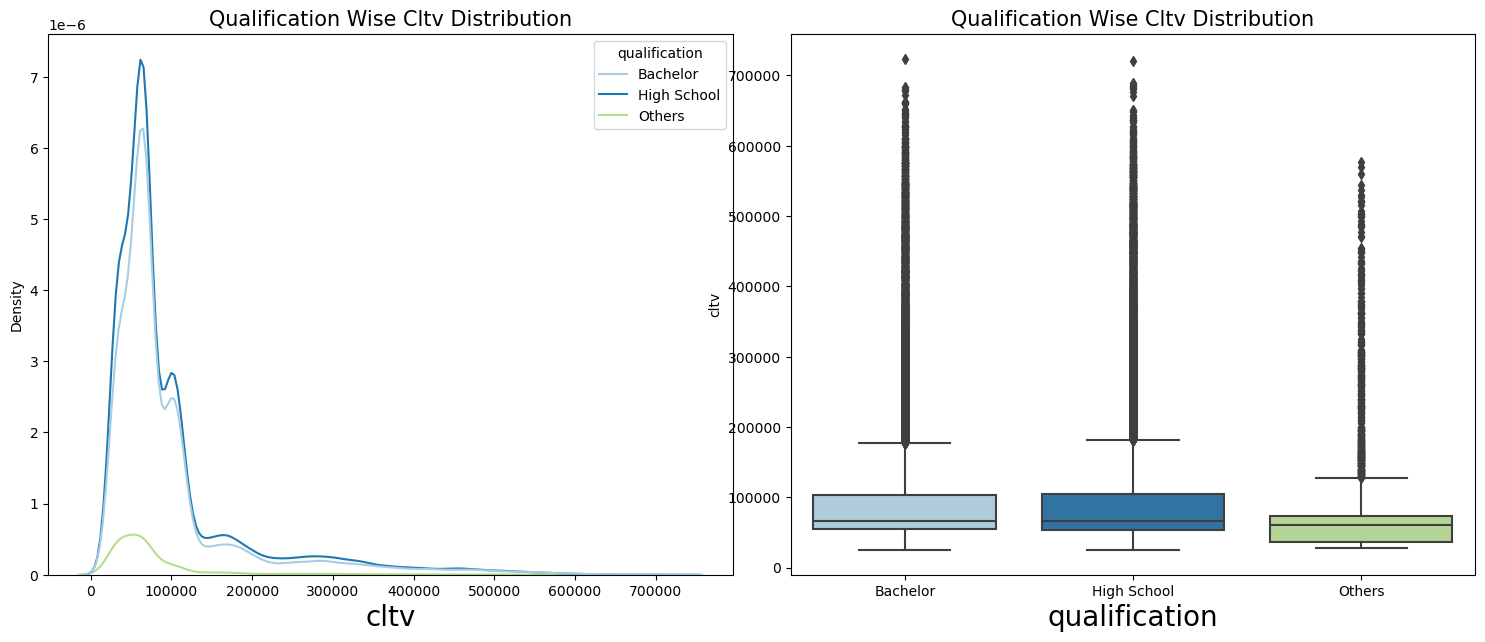

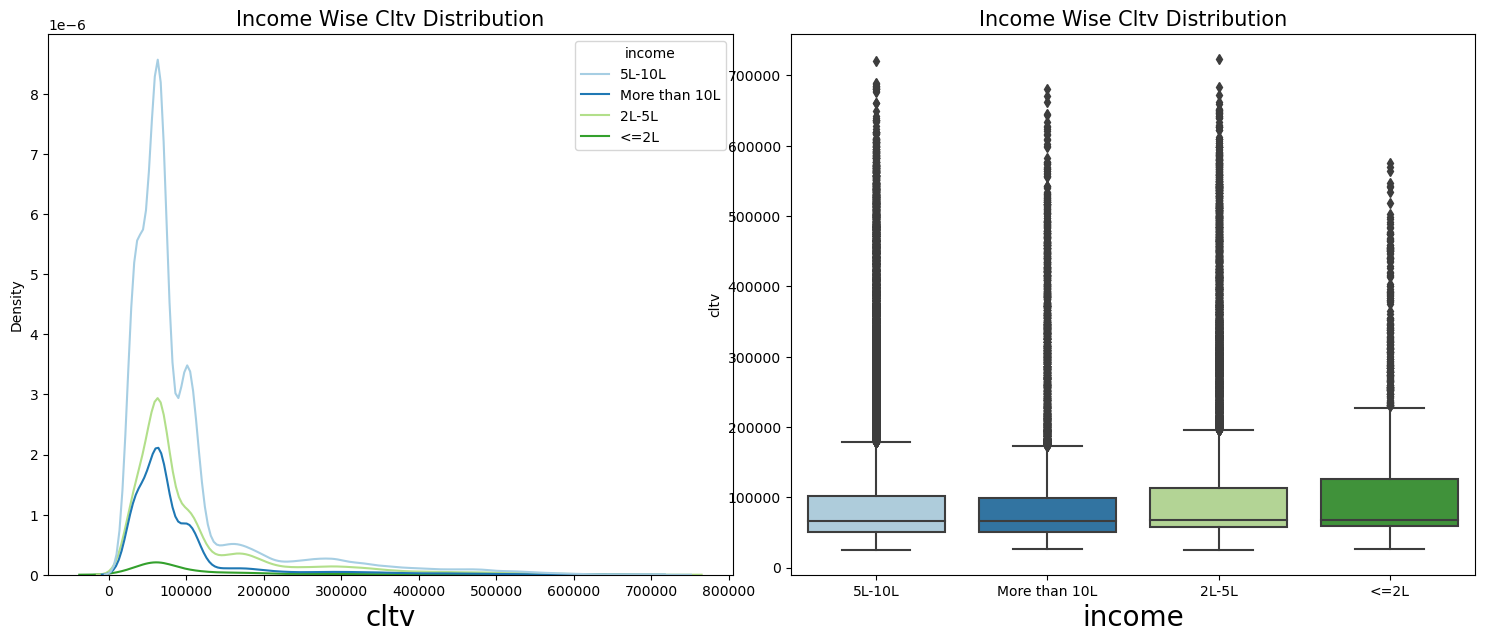

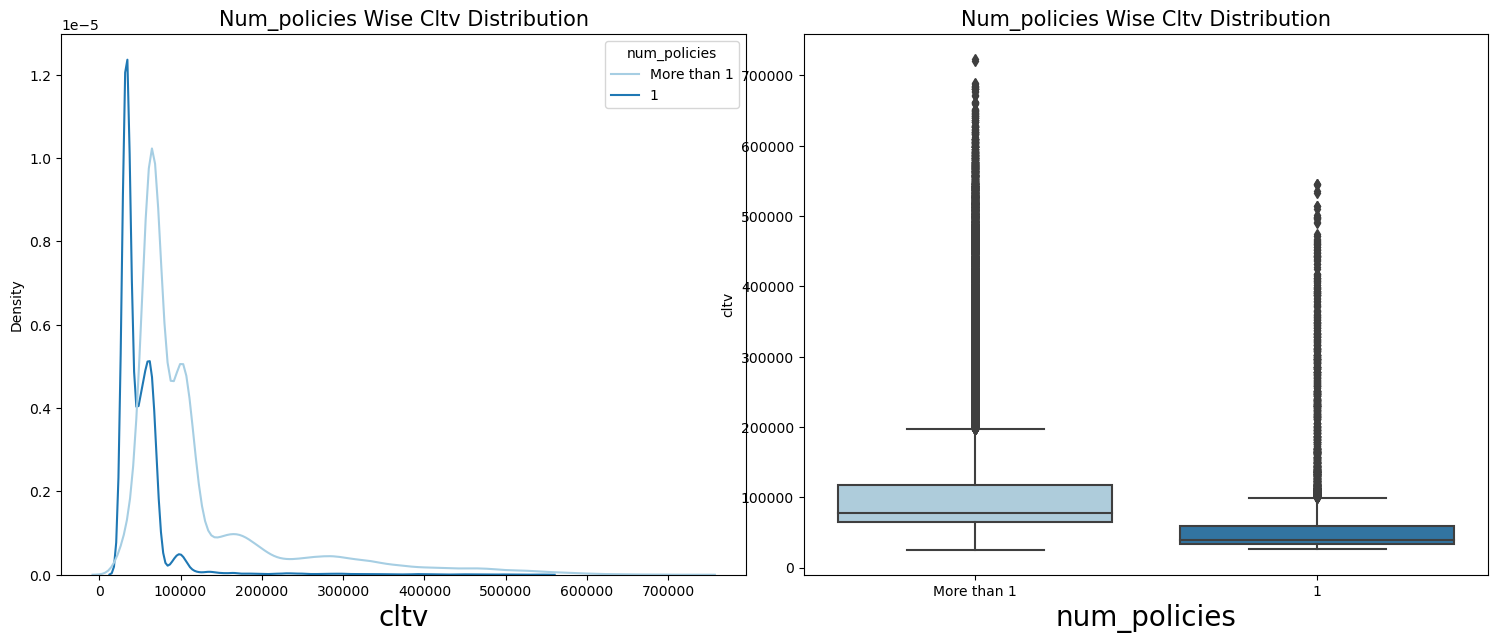

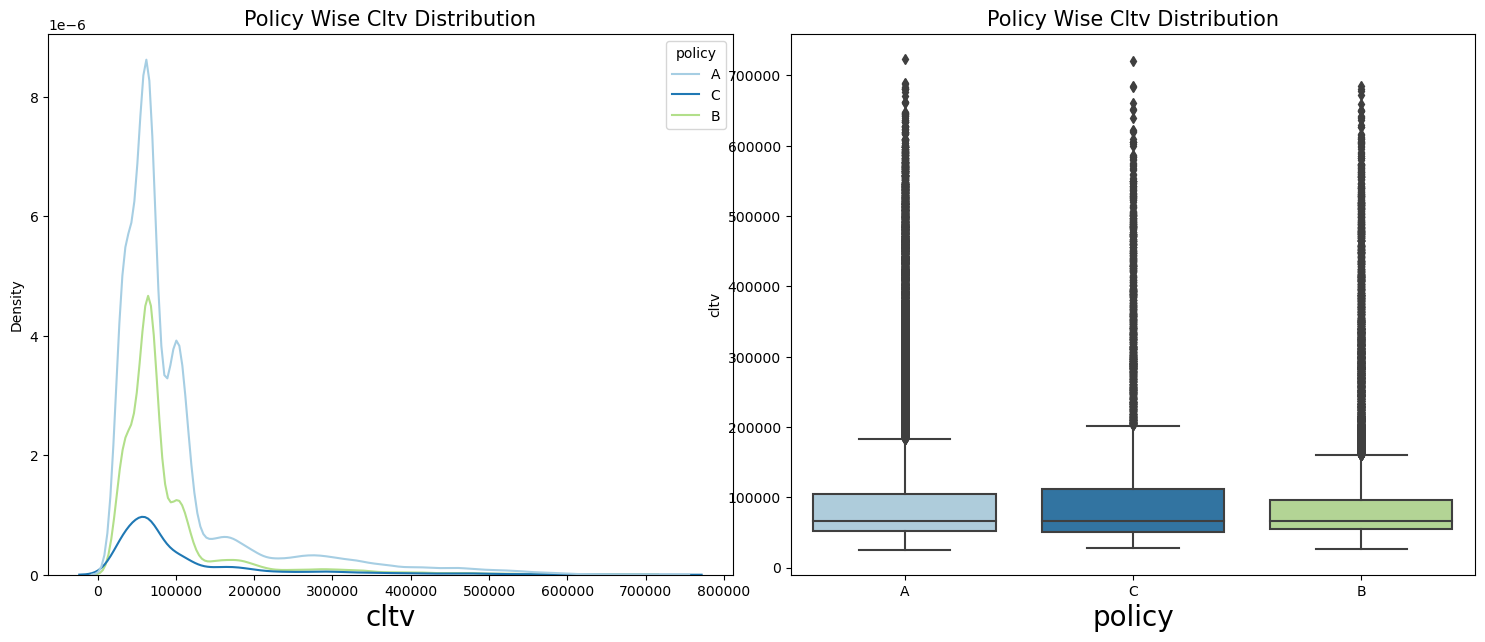

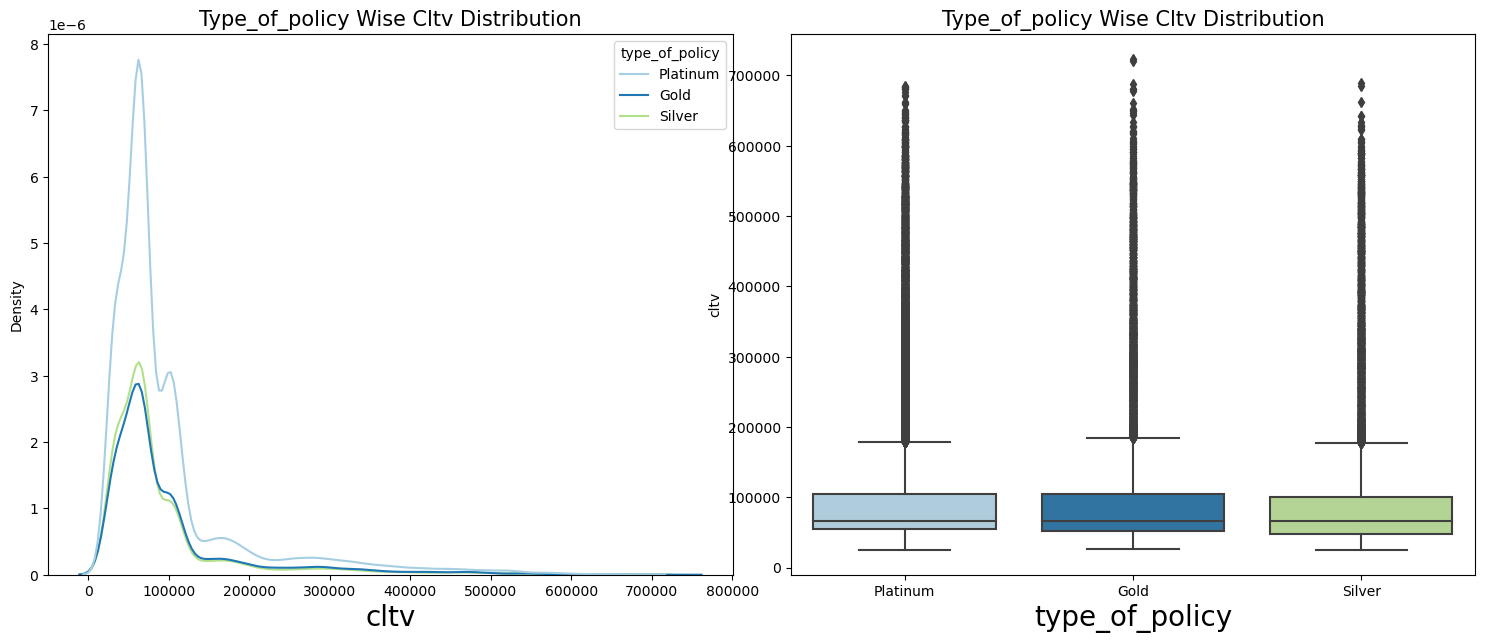

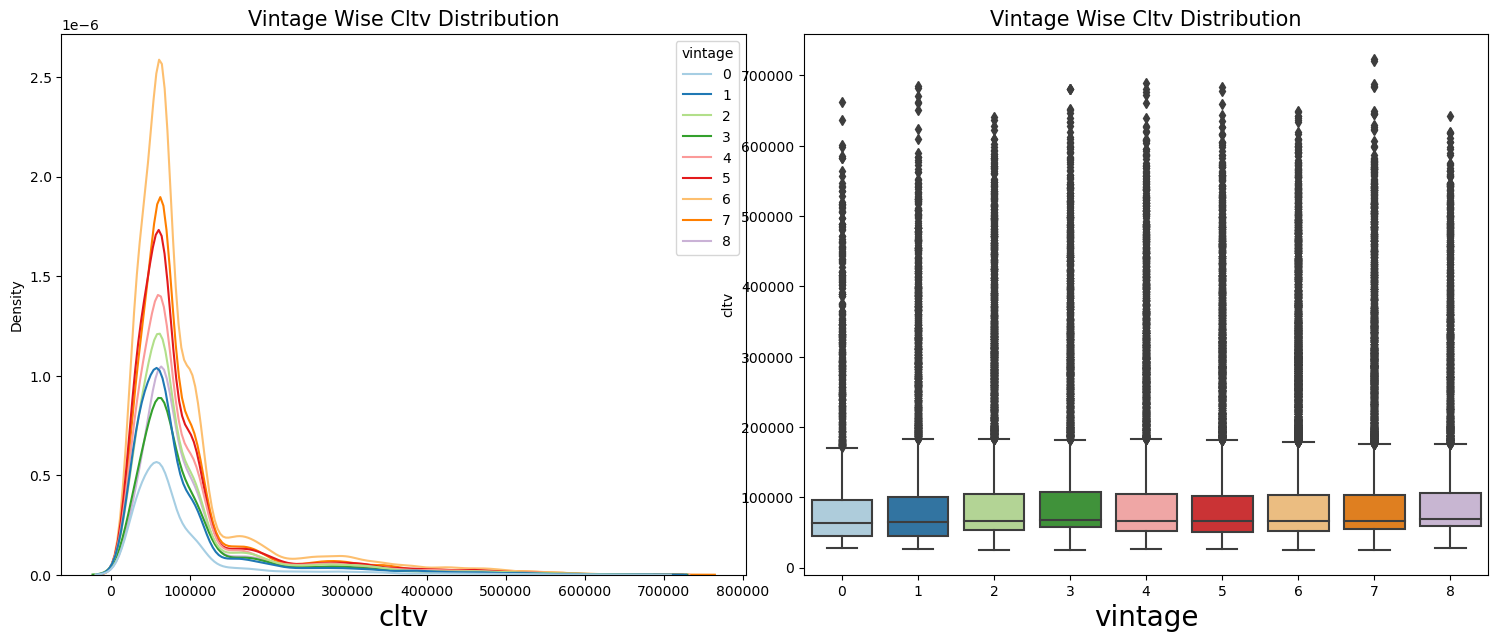

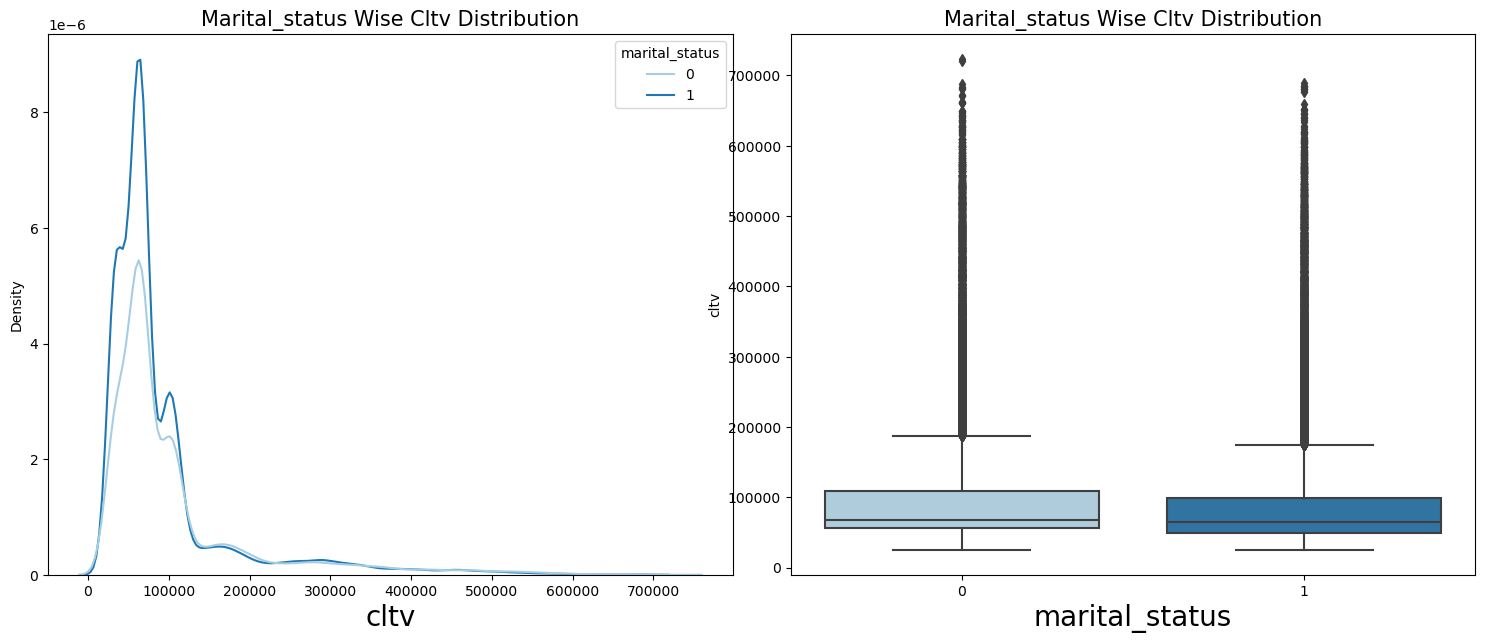

In [12]:
for i,col  in enumerate(objects): 
    _=side_by_side_plot(df,col,'cltv')

- if no off policies are more than on then probablity of getting higher cltv is higher same with type of policy if policy type is platinum   then probablity of getting higher cltv is higher
- if coustemer is from urban area then also probability of grttindg higher cltv is more

In [ ]:
cltv_data.groupby(["area"])["claim_amount"].sum

In [14]:
 grpcol=['gender', 'area', 'qualification', 
            'income', 'num_policies', 
            'policy','type_of_policy',
            'marital_status', 'vintage',]

In [18]:
 for cols in grpcol:
            df1=(cltv_data.groupby([cols])['claim_amount'].agg({'min','median','mean','max'}).reset_index())
            df1

In [19]:
df1

,vintage,max,min,mean,median
0,0,28190,0,3759.460184,3700.0
1,1,23697,0,4301.474514,4056.0
2,2,30659,0,4547.638080,4220.0
3,3,28859,0,4519.826676,4191.0
4,4,27413,0,4337.973450,4112.0
5,5,28022,0,4354.958737,4125.0
6,6,31894,0,4342.626372,4086.0
7,7,30379,0,4304.477969,4047.0
8,8,31367,0,4437.041842,4081.5


In [26]:
df1=(cltv_data.groupby(["area"])['claim_amount'].agg({'min','sum','mean','max'}).reset_index())
df1

,area,sum,min,mean,max
0,Rural,56860981,0,2110.887664,27266
1,Urban,332128523,0,5317.885245,31894


In [33]:
  def feature_eng(df,cols):
        df1=(df.groupby([cols])['claim_amount'].agg({'min','median','mean','max'}).reset_index())
        df1=(df1.rename(columns={c:f"{cols}_claim_amount_{c}" for c in df1.loc[:,df1.columns.str.match("(min|median|mean|max)")]}))
            
        
            
        return df1

In [35]:
feature_eng(cltv_data,"area")


,area,area_claim_amount_max,area_claim_amount_min,area_claim_amount_mean,area_claim_amount_median
0,Rural,27266,0,2110.887664,2113.0
1,Urban,31894,0,5317.885245,5158.0


In [36]:
feature_eng(cltv_data,"qualification")

,qualification,qualification_claim_amount_max,qualification_claim_amount_min,qualification_claim_amount_mean,qualification_claim_amount_median
0,Bachelor,31894,0,4180.123226,3967.0
1,High School,29736,0,4545.078146,4234.0
2,Others,31367,0,3764.175120,3771.5


In [37]:
feature_eng(cltv_data,"income")

,income,income_claim_amount_max,income_claim_amount_min,income_claim_amount_mean,income_claim_amount_median
0,2L-5L,31894,0,5250.185225,5258.0
1,5L-10L,31367,0,4174.886391,3955.0
2,<=2L,21982,0,6055.969256,5773.0
3,More than 10L,26945,0,3410.056133,3188.0


In [38]:
feature_eng(cltv_data,"vintage")

,vintage,vintage_claim_amount_max,vintage_claim_amount_min,vintage_claim_amount_mean,vintage_claim_amount_median
0,0,28190,0,3759.460184,3700.0
1,1,23697,0,4301.474514,4056.0
2,2,30659,0,4547.638080,4220.0
3,3,28859,0,4519.826676,4191.0
4,4,27413,0,4337.973450,4112.0
5,5,28022,0,4354.958737,4125.0
6,6,31894,0,4342.626372,4086.0
7,7,30379,0,4304.477969,4047.0
8,8,31367,0,4437.041842,4081.5


In [41]:
train_data = pd.read_csv("CLTV.csv")#loading the data set for traning

In [42]:
df = train_data.drop(['id'], axis=1)

In [43]:
df["claim_amount"]= np.sqrt(df["claim_amount"])

In [44]:
df["cltv"]= np.log(df["cltv"])

In [45]:
Name=[]
for col in ['gender', 'area', 'qualification', 'income', 'num_policies', 'policy', 'type_of_policy', ]:
    names=df[col].unique().tolist()
    Name+=[names]
    print(names)

['Male', 'Female']
['Urban', 'Rural']
['Bachelor', 'High School', 'Others']
['5L-10L', 'More than 10L', '2L-5L', '<=2L']
['More than 1', '1']
['A', 'C', 'B']
['Platinum', 'Gold', 'Silver']


In [46]:
gender_map=dict(zip(Name[0],[1,0])) 
area_map=dict(zip(Name[1],[1,0])) 
qualification_map=dict(zip(Name[2],[2,1,0])) 
income_map=dict(zip(Name[3],[2,3,1,0])) 
num_policies_map=dict(zip(Name[4],[1,0])) 
policy_map=dict(zip(Name[5],[0,2,1])) 
type_of_policy_map=dict(zip(Name[6],[2,1,0]))

In [47]:
df['gender']=df['gender'].map(gender_map)
df['area']=df['area'].map(area_map)
df['qualification']=df['qualification'].map(qualification_map)
df['income']=df['income'].map(income_map)
df['num_policies']=df['num_policies'].map(num_policies_map)
df['policy']=df['policy'].map(policy_map)
df['type_of_policy']=df['type_of_policy'].map(type_of_policy_map)

In [49]:
df.head()


,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,1,2,2,1,5,76.092050,1,0,2,11.071439
1,1,0,1,2,0,8,71.274119,1,0,2,13.152699
2,1,1,2,2,1,8,50.980388,1,0,2,11.069945
3,0,0,1,2,0,7,0.000000,1,0,2,11.491906
4,1,1,1,3,1,6,59.228372,1,0,1,10.997690


In [50]:
df.isnull().sum()
    

gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
cltv              0
dtype: int64

In [52]:
#seperating independent and dependent variables

x = df.drop(['cltv'], axis=1)
y = df['cltv']
x.shape, y.shape

((89392, 10), (89392,))

In [53]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.32,random_state=42,stratify=x['num_policies'])

In [54]:
#importing Linear Regression and metric mean square error
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from math import sqrt
scaler = StandardScaler()


In [55]:
from sklearn.model_selection import cross_val_score

In [56]:
lr_1 = LR()

In [59]:
# Creating instance of Linear Regresssion
lr = LR()

# Fitting the model
lr.fit(train_x, train_y)

LinearRegression()

In [60]:
lr.score(train_x, train_y)

0.3115395615066061

In [61]:
lr.score(test_x,test_y)

0.3143986037547034

Text(0.5, 1.0, 'Coefficient plot')

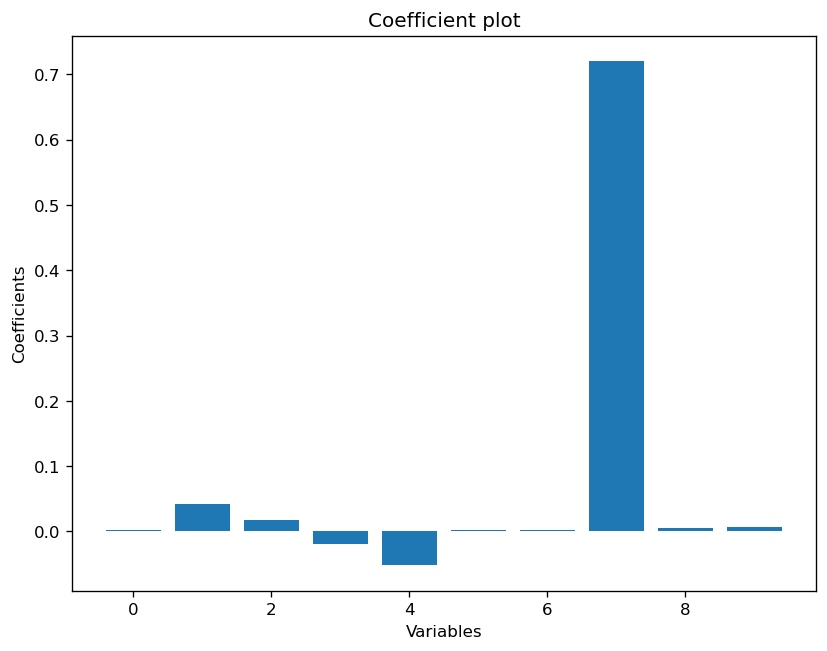

In [62]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

In [64]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 0.41394919337321634


In [65]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     0.41635841911876476


In [71]:
# Arranging and calculating the Residuals
residuals = pd.DataFrame({
    'fitted values' : test_y,
    'predicted values' : test_predict,
})

residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']
residuals.head()

,fitted values,predicted values,residuals
64109,10.438576,10.671664,-0.233088
66652,10.541650,10.708848,-0.167198
60889,11.175044,11.524408,-0.349363
19796,10.978831,10.771817,0.207014
81892,10.792366,10.732312,0.060054


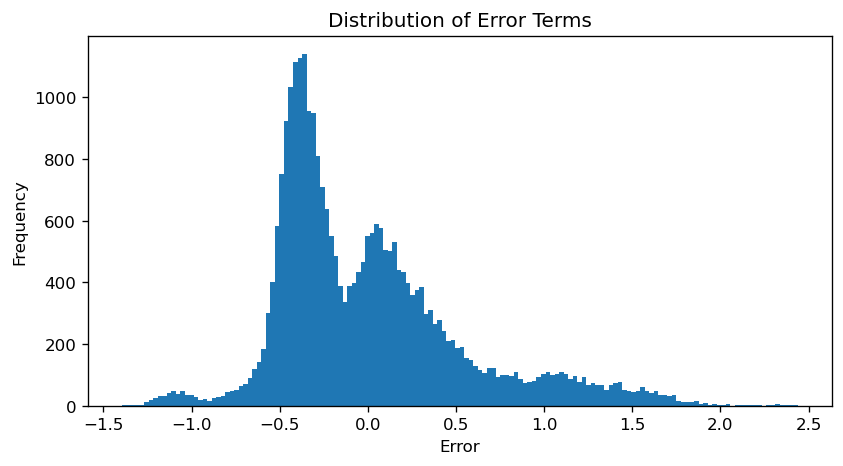

In [74]:
# Histogram for distribution
plt.figure(figsize=(8, 4), dpi=120, facecolor='w', edgecolor='b')
plt.hist(residuals.residuals, bins = 150)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Error Terms')
plt.show()

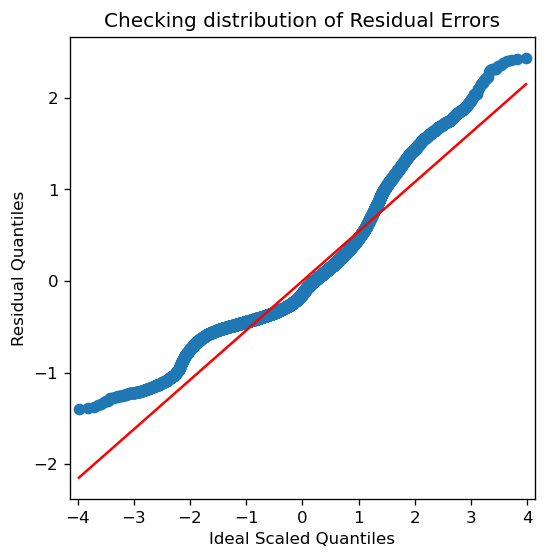

In [75]:
# importing the QQ-plot from the from the statsmodels
from statsmodels.graphics.gofplots import qqplot

## Plotting the QQ plot
fig, ax = plt.subplots(figsize=(5,5) , dpi = 120)
qqplot(residuals.residuals, line = 's' , ax = ax)
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of Residual Errors')
plt.show()

In [78]:
# Importing Variance_inflation_Factor funtion from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calculating VIF for every column (only works for the not Catagorical)
VIF = pd.Series([variance_inflation_factor(df.values, i) for i in range(df.shape[1])], index =df.columns)
VIF

gender             2.333428
area               4.644293
qualification      7.020199
income             9.130099
marital_status     2.382387
vintage            5.018791
claim_amount       5.908427
num_policies       3.495564
policy             1.534186
type_of_policy     3.524579
cltv              34.906110
dtype: float64

In [79]:
# Creating instance of Linear Regresssion
lr = LR(normalize = True)

# Fitting the model
lr.fit(train_x, train_y)

G:\softwares\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [80]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 0.41394919337321623


In [82]:
lr.score(train_x, train_y)

0.3115395615066061

In [58]:
cross_val_score(lr_1,train_x,train_y,scoring='r2',cv=30)

array([0.31460286, 0.33622405, 0.30555755, 0.31249892, 0.31332436,
       0.3141548 , 0.32344233, 0.31464066, 0.29421817, 0.31365019,
       0.33334449, 0.28838649, 0.30995737, 0.33472408, 0.32062366,
       0.30228631, 0.28836324, 0.31672352, 0.2940724 , 0.30368848,
       0.31754292, 0.29695373, 0.2948083 , 0.30306909, 0.29195992,
       0.32411369, 0.31615315, 0.32017682, 0.31462439, 0.31936166])